In [41]:
%%time
from IPython.display import HTML
custom_css = """
HTML(custom_css)
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.signal import savgol_filter, medfilt
from scipy.spatial import distance

np.set_printoptions(threshold=np.inf)

# data preprocessing
path1 = r"https://raw.githubusercontent.com/AjStephan/olivier-piw/main/dataplasmonic.csv"
olpiw_new = pd.read_csv(path1)
olpiw_new = olpiw_new.drop(olpiw_new.columns[0:100], axis=1)
olpiw_new

CPU times: total: 188 ms
Wall time: 48.6 s


,380.886,381.682,382.479,383.276,384.072,384.869,385.665,386.461,387.258,388.054,...,996.522,997.252,997.981,998.71,999.439,1000.168,thickness,size,materials,dielect1
0,97.12,104.14,101.63,97.40,98.97,98.05,100.02,100.94,98.11,97.76,...,101.02,98.53,100.70,99.78,99.93,99.88,4.0,50,2.6,10.4
1,98.71,98.99,101.61,100.21,97.75,102.39,95.51,103.71,99.87,99.18,...,101.23,100.09,99.40,99.98,99.89,100.24,4.0,51,2.6,10.4
2,99.03,97.45,98.16,96.62,97.71,102.11,97.03,101.46,100.24,99.37,...,101.09,100.73,100.06,98.51,101.00,100.63,4.0,51,2.6,10.4
3,103.54,101.35,98.14,100.26,100.07,99.72,100.54,98.86,102.95,96.61,...,99.96,101.15,99.76,99.55,100.17,99.75,4.0,51,2.6,10.4
4,99.11,99.18,97.83,102.72,98.97,103.53,99.24,98.35,104.43,102.46,...,99.21,101.04,97.81,100.82,99.52,99.56,4.0,52,2.6,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,100.80,99.60,98.35,98.53,98.92,99.28,100.42,99.56,99.78,98.87,...,99.53,100.01,99.35,99.71,99.54,100.08,4.0,58,1.6,6.4
571,100.89,98.57,98.96,99.48,97.70,99.66,98.39,98.67,98.83,98.21,...,99.62,99.55,99.71,99.81,100.07,100.01,4.0,70,1.6,6.4
572,99.99,97.15,98.81,99.65,99.25,99.01,100.41,98.58,99.56,98.84,...,99.79,99.85,100.12,100.08,99.81,99.76,4.0,61,1.6,6.4
573,100.32,98.94,100.56,99.63,100.25,99.63,98.61,98.37,99.05,98.31,...,99.98,100.21,100.02,100.41,99.91,100.20,4.0,64,1.6,6.4


In [42]:
olpiw_clean_new = olpiw_new.drop(columns=['thickness', 'size', 'materials', 'dielect1'])
olpiw_data_new = olpiw_clean_new.copy()

# #remove last 100 columns
# olpiw_clean_new = olpiw_clean_new.iloc[:, :-100]
#olpiw_data_new = -np.log(olpiw_clean_new / 100)
original_columns_new = olpiw_clean_new.columns

# create initial dataframe
data_olpiw_new = olpiw_data_new
data_olpiw2_new = olpiw_new.iloc[:, -4:]
init_df_new = pd.concat([data_olpiw_new,data_olpiw2_new], axis=1).sort_values(by=["materials", 'thickness', "size"])
init_df_new.reset_index(drop=True, inplace=True)
init_df_new.head()

,380.886,381.682,382.479,383.276,384.072,384.869,385.665,386.461,387.258,388.054,...,996.522,997.252,997.981,998.71,999.439,1000.168,thickness,size,materials,dielect1
0,98.92,98.82,99.14,99.61,100.86,100.85,99.36,99.48,100.33,98.78,...,100.11,100.29,99.79,100.30,100.07,99.94,2.0,48,1.6,3.2
1,98.19,97.95,99.58,98.50,98.70,99.25,100.43,99.38,99.68,98.51,...,99.78,100.13,100.26,100.01,100.23,100.12,2.0,50,1.6,3.2
2,97.96,98.43,100.97,100.43,99.97,99.72,97.58,98.97,99.43,98.92,...,100.54,100.35,100.40,100.25,100.07,100.01,2.0,50,1.6,3.2
3,99.10,100.16,101.15,98.86,100.88,99.74,99.36,99.91,99.15,100.40,...,100.15,99.63,99.95,99.97,100.06,99.83,2.0,50,1.6,3.2
4,99.51,99.52,100.38,100.31,98.78,99.23,99.62,98.92,100.18,100.15,...,99.96,99.82,100.20,99.87,99.69,99.78,2.0,50,1.6,3.2


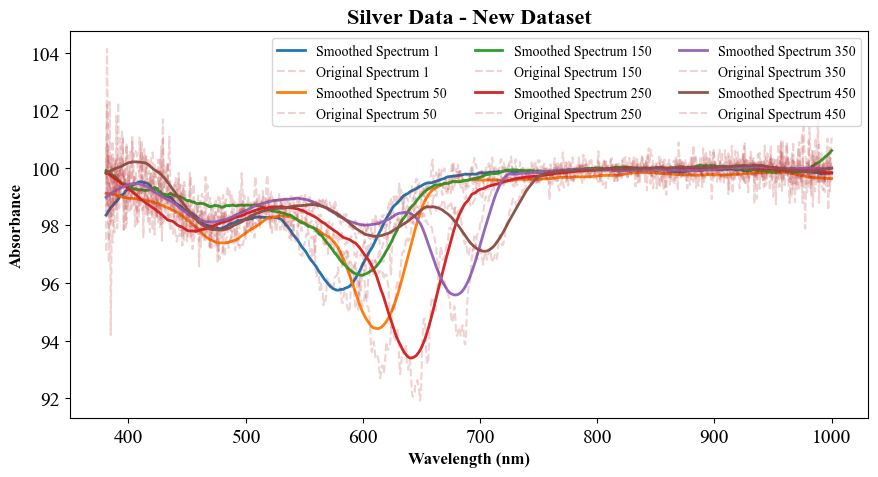

In [43]:
silver_data_new = olpiw_data_new.to_numpy()

smooth_new = savgol_filter(
    silver_data_new, window_length=101, polyorder=3, axis=1, mode='nearest')
smooth_new_df = pd.DataFrame(smooth_new, columns=original_columns_new)

spectra_indices = [0, 49, 149, 249, 349, 449]
smooth_colors = sns.color_palette("tab10", 6)

plt.figure(figsize=(9, 5))
plt.rcParams.update({'font.size': 14, 'font.family': 'Times New Roman'})

for i, idx in enumerate(spectra_indices):
    plt.plot(
        original_columns_new.astype(float),
        smooth_new_df.iloc[idx, :],
        label=f'Smoothed Spectrum {idx + 1}',
        linewidth=2,
        color=smooth_colors[i]
    )
    plt.plot(
        original_columns_new.astype(float),
        silver_data_new[idx, :],
        label=f'Original Spectrum {idx + 1}',
        linestyle='--',
        color='firebrick',
        alpha=0.2
    )

plt.xlabel('Wavelength (nm)', fontsize=12, fontweight='bold')
plt.ylabel('Absorbance', fontsize=12, fontweight='bold')
plt.title('Silver Data - New Dataset', fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=10, ncol=3)
plt.grid(False)
plt.tight_layout()
plt.show()

In [44]:
np.set_printoptions(threshold= np.inf)

values_new = pd.DataFrame(smooth_new_df.values, columns=original_columns_new)
values2_new = init_df_new.iloc[:, -4:]
original_df_new = pd.concat([values_new, values2_new], axis=1).sort_values(by=["materials", 'thickness', "size"])
original_df_new.reset_index(drop=True, inplace=True)
original_df_new.head()

,380.886,381.682,382.479,383.276,384.072,384.869,385.665,386.461,387.258,388.054,...,996.522,997.252,997.981,998.71,999.439,1000.168,thickness,size,materials,dielect1
0,98.362880,98.399871,98.469403,98.513184,98.568322,98.624952,98.651503,98.692508,98.725169,98.781316,...,99.823997,99.815758,99.813219,99.826655,99.835610,99.843754,2.0,48,1.6,3.2
1,99.124249,99.157949,99.177207,99.171905,99.194115,99.221272,99.264833,99.280352,99.290516,99.310823,...,100.101397,100.092225,100.071234,100.065558,100.079283,100.054050,2.0,50,1.6,3.2
2,99.184696,99.176329,99.202873,99.201094,99.231629,99.249392,99.244433,99.228961,99.220618,99.212728,...,100.173818,100.183243,100.201268,100.211406,100.239359,100.253298,2.0,50,1.6,3.2
3,101.874609,101.783456,101.695186,101.602489,101.519000,101.419005,101.325988,101.244803,101.188960,101.132085,...,99.968382,99.963167,99.948461,99.937078,99.915361,99.914183,2.0,50,1.6,3.2
4,99.646041,99.666749,99.677124,99.689746,99.714435,99.743602,99.761991,99.779317,99.791801,99.829545,...,99.702700,99.699878,99.696053,99.694196,99.690084,99.687658,2.0,50,1.6,3.2


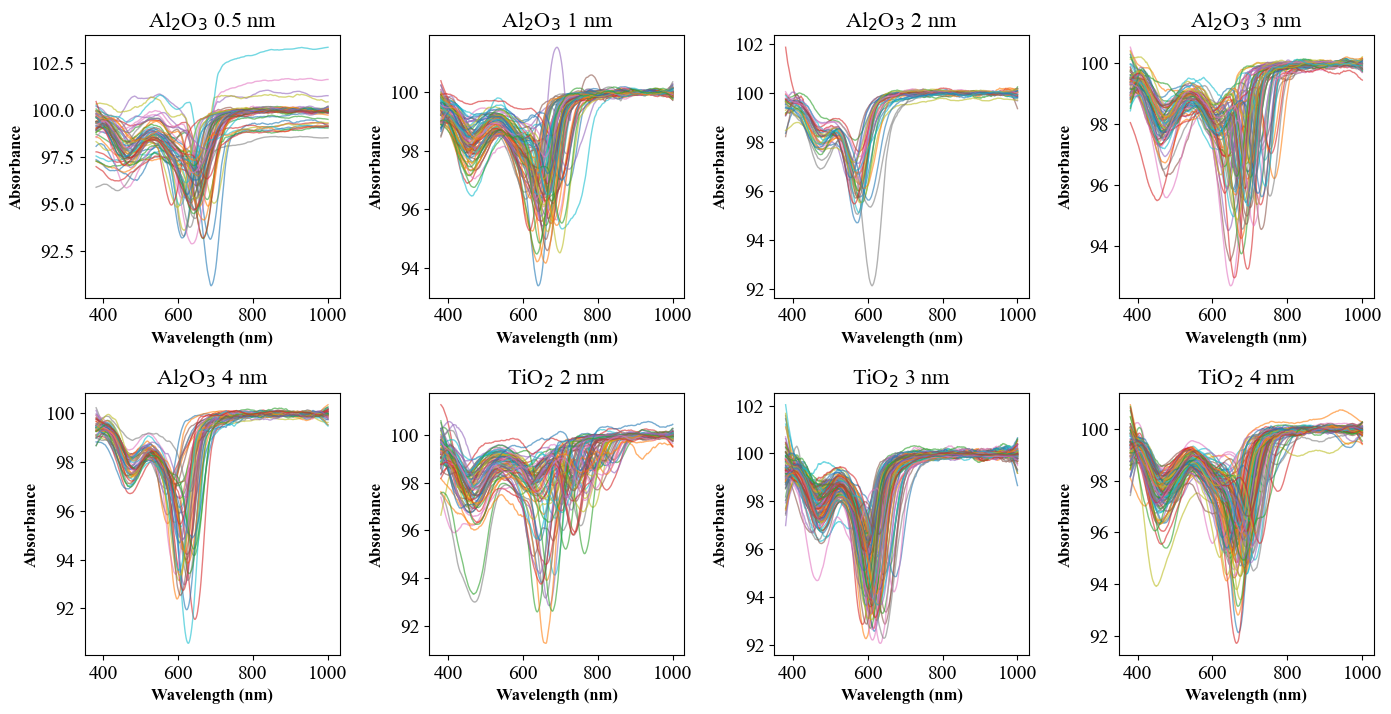

In [45]:
thickness_values = [0.5, 1, 2, 3, 4]
material_values = [1.6, 2.6]
names = ["Al$_2$O$_3$ 0.5 nm", "Al$_2$O$_3$ 1 nm", "Al$_2$O$_3$ 2 nm", "Al$_2$O$_3$ 3 nm", 
         "Al$_2$O$_3$ 4 nm", "TiO$_2$ 2 nm", "TiO$_2$ 3 nm", "TiO$_2$ 4 nm"]
datasets_new = []

for thickness in thickness_values:
    for materials in material_values:
        dataset = original_df_new[(original_df_new['thickness'] == thickness) & (original_df_new['materials'] == materials)]
        if not dataset.empty:
            datasets_new.append(dataset)

al2o3 = original_df_new[original_df_new['materials'] == 1.6].sort_values(by=['thickness', "size"])
tio2 = original_df_new[original_df_new['materials'] == 2.6].sort_values(by=['thickness', "size"])

plt.figure(figsize=(14, 8))
for i, dataset in enumerate(datasets_new):
    plt.subplot(2, 4, i + 1)
    for _, row in dataset.iterrows():
        plt.plot(dataset.columns[:-4].astype(float), row[:-4], linewidth=1, alpha=0.6)
    plt.title(names[i], fontsize=16)
    plt.xlabel('Wavelength (nm)', fontsize=12, fontweight='bold')
    plt.ylabel('Absorbance', fontsize=12, fontweight='bold')
    plt.grid(False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

C:\Users\Chamod Peiris\AppData\Local\Temp\ipykernel_4460\2873308193.py:45: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



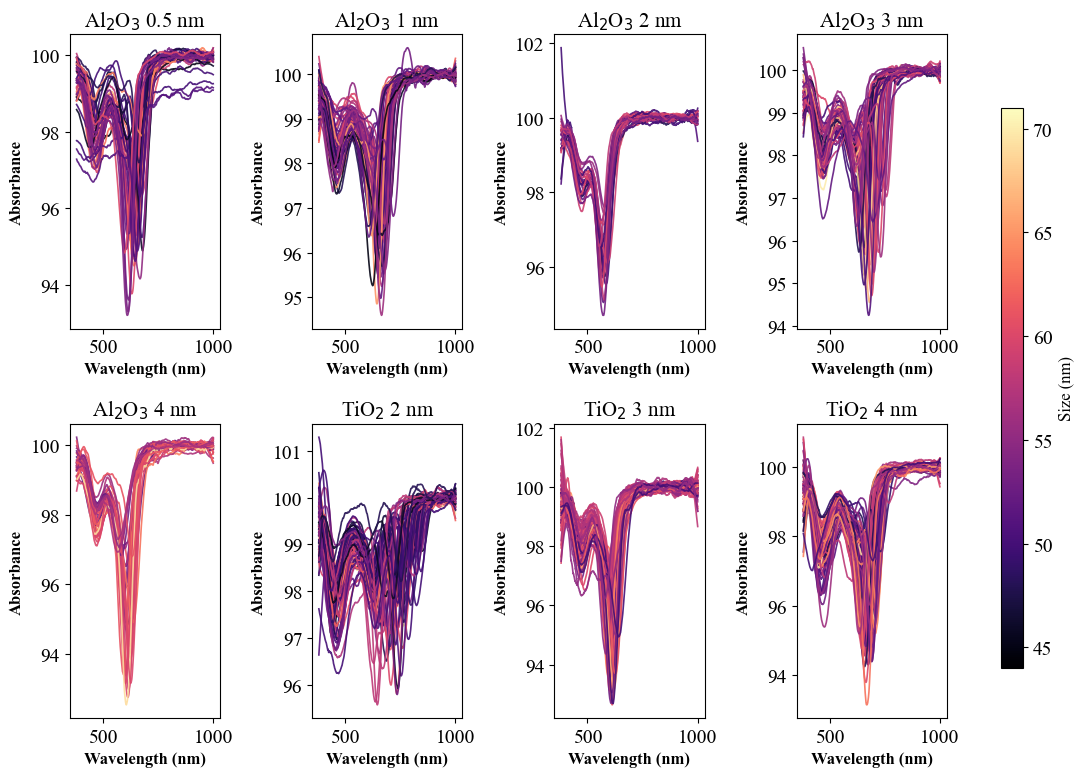

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import pairwise_distances

cmap = sns.color_palette("magma", as_cmap=True)

all_sizes = original_df_new['size'].values
norm = plt.Normalize(vmin=all_sizes.min(), vmax=all_sizes.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

plt.figure(figsize=(11, 8))

for i, dataset in enumerate(datasets_new):
    plt.subplot(2, 4, i + 1)

    spectra_data = dataset.iloc[:, :-4].astype(float).values
    mean_spectrum = spectra_data.mean(axis=0).reshape(1, -1)
    distances = pairwise_distances(spectra_data, mean_spectrum).flatten()

    n_samples_to_plot = int(len(distances) * 8 / 10)
    selected_indices = np.argsort(distances)[:n_samples_to_plot]
    
    for idx in selected_indices:
        row = dataset.iloc[idx]
        size_val = row['size']
        color = cmap(norm(size_val))
        plt.plot(
            dataset.columns[:-4].astype(float),
            row[:-4],
            color=color,
            linewidth=1.2,
            alpha=0.9
        )
    
    plt.title(names[i], fontsize=15)
    plt.xlabel('Wavelength (nm)', fontsize=12, fontweight='bold')
    plt.ylabel('Absorbance', fontsize=12, fontweight='bold')
    plt.grid(False)

cbar_ax = plt.axes([0.92, 0.15, 0.02, 0.7])
cb = plt.colorbar(sm, cax=cbar_ax)
cb.set_label('Size (nm)', fontsize=12)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

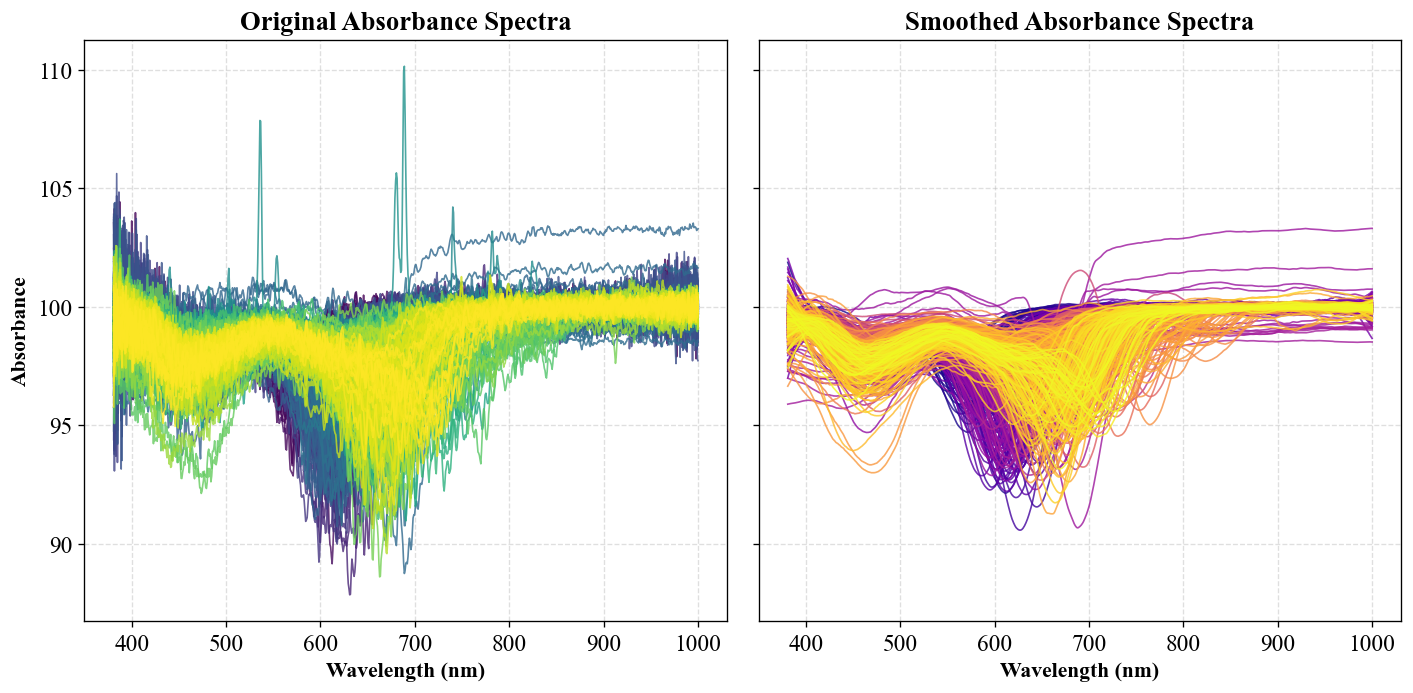

In [47]:
num_spectra = olpiw_data_new.shape[0]
num_smoothed = smooth_new_df.shape[0]

colors_original = plt.cm.viridis(np.linspace(0, 1, num_spectra))
colors_smoothed = plt.cm.plasma(np.linspace(0, 1, num_smoothed))

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, dpi=120)
plt.rcParams.update({'font.size': 14, 'font.family': 'Times New Roman'})

for i in range(num_spectra):
    axes[0].plot(
        original_columns_new.astype(float),
        olpiw_data_new.iloc[i, :],
        color=colors_original[i],
        alpha=0.8,
        linewidth=1.0
    )
axes[0].set_title('Original Absorbance Spectra', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Wavelength (nm)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Absorbance', fontsize=13, fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.4)

for i in range(num_smoothed):
    axes[1].plot(
        original_columns_new.astype(float),
        smooth_new_df.iloc[i, :],
        color=colors_smoothed[i],
        alpha=0.8,
        linewidth=1.0
    )
axes[1].set_title('Smoothed Absorbance Spectra', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Wavelength (nm)', fontsize=13, fontweight='bold')
axes[1].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [48]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import LabelEncoder, StandardScaler

UNSEEN_COUNT = [3, 5, 8]

unseen_dfs_New = {}
train_dfs_New = {}

for unseen_n in UNSEEN_COUNT:
    unseen_df = original_df_new.iloc[:unseen_n].copy().reset_index(drop=True)
    train_df = original_df_new.iloc[unseen_n:].copy().reset_index(drop=True)
    unseen_dfs_New[unseen_n] = unseen_df
    train_dfs_New[unseen_n] = train_df

    unseen_name = f"unseen_df_{unseen_n}"
    train_name = f"train_df_{unseen_n}"

    print(f"{unseen_name} shape: {unseen_df.shape}")
    print(f"{train_name} shape: {train_df.shape}")

unseen_df_New_3 = unseen_dfs_New[3]
unseen_df_New_5 = unseen_dfs_New[5]
unseen_df_New_8 = unseen_dfs_New[8]
train_df_New_3 = train_dfs_New[3]
train_df_New_5 = train_dfs_New[5]
train_df_New_8 = train_dfs_New[8]

unseen_df_3 shape: (3, 813)
train_df_3 shape: (572, 813)
unseen_df_5 shape: (5, 813)
train_df_5 shape: (570, 813)
unseen_df_8 shape: (8, 813)
train_df_8 shape: (567, 813)


In [49]:
# Reset index to avoid overlapping index issues
original_df_new = original_df_new.reset_index(drop=True)

# Pick 1 sample per thickness class for unseen
unseen_df_New_5 = (
    original_df_new
    .groupby('thickness', group_keys=False)
    .apply(lambda x: x.sample(n=1, random_state=42))
    .copy()
)

# Get index of unseen samples
unseen_idx = unseen_df_New_5.index

# Build training set excluding unseen samples
train_df_New_5 = original_df_new.drop(index=unseen_idx).reset_index(drop=True)

# Final checks
print(f"unseen_df_New_5 shape: {unseen_df_New_5.shape}")
print(f"train_df_New_5 shape: {train_df_New_5.shape}")
print("Thickness classes in unseen_df_New_5:", unseen_df_New_5['thickness'].unique())

unseen_df_New_5 shape: (5, 813)
train_df_New_5 shape: (570, 813)
Thickness classes in unseen_df_New_5: [0.5 1.  2.  3.  4. ]


C:\Users\Chamod Peiris\AppData\Local\Temp\ipykernel_4460\195268209.py:8: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB

X = train_df_New_5.iloc[:, :-4]
y = train_df_New_5['thickness']
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Passive Aggressive": PassiveAggressiveClassifier(random_state=42, max_iter=1000, tol=1e-3),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = []

for name, model in models.items():
    try:
        model.fit(X_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Metrics
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred, average='weighted')

        results.append({
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "F1 Score": f1
        })

    except Exception as e:
        results.append({
            "Model": name,
            "Train Accuracy": None,
            "Test Accuracy": None,
            "F1 Score": None,
            "Error": str(e)
        })

results_df = pd.DataFrame(results)
results_df

c:\Users\Chamod Peiris\Documents\GitHub\Silver_Nanocube_based_Gap_Plasmon_Resonators\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Chamod Peiris\Documents\GitHub\Silver_Nanocube_based_Gap_Plasmon_Resonators\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[13:56:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




,Model,Train Accuracy,Test Accuracy,F1 Score
0,Extra Trees,1.000000,0.596491,0.588638
1,Random Forest,1.000000,0.605263,0.598632
2,SVM,0.596491,0.570175,0.542462
3,Decision Tree,1.000000,0.438596,0.448111
4,Gradient Boost,1.000000,0.596491,0.586726
5,AdaBoost,0.550439,0.491228,0.488165
6,Logistic Regression,0.570175,0.482456,0.475479
7,Passive Aggressive,0.372807,0.464912,0.360319
8,Naive Bayes,0.478070,0.578947,0.577198
9,XGBoost,1.000000,0.596491,0.593856


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB

X = train_df_New_5.iloc[:, :-4]
y = train_df_New_5['materials']
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Passive Aggressive": PassiveAggressiveClassifier(random_state=42, max_iter=1000, tol=1e-3),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = []

for name, model in models.items():
    try:
        model.fit(X_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Metrics
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred, average='weighted')

        results.append({
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "F1 Score": f1
        })

    except Exception as e:
        results.append({
            "Model": name,
            "Train Accuracy": None,
            "Test Accuracy": None,
            "F1 Score": None,
            "Error": str(e)
        })

results_df = pd.DataFrame(results)
results_df

c:\Users\Chamod Peiris\Documents\GitHub\Silver_Nanocube_based_Gap_Plasmon_Resonators\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\Chamod Peiris\Documents\GitHub\Silver_Nanocube_based_Gap_Plasmon_Resonators\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning:

[13:57:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




,Model,Train Accuracy,Test Accuracy,F1 Score
0,Extra Trees,1.000000,0.903509,0.903796
1,Random Forest,1.000000,0.885965,0.885602
2,SVM,0.936404,0.894737,0.894044
3,Decision Tree,1.000000,0.850877,0.849357
4,Gradient Boost,1.000000,0.885965,0.885602
5,AdaBoost,1.000000,0.885965,0.885602
6,Logistic Regression,0.949561,0.894737,0.893259
7,Passive Aggressive,0.304825,0.342105,0.174407
8,Naive Bayes,0.778509,0.771930,0.777658
9,XGBoost,1.000000,0.885965,0.884802


In [33]:
import pandas as pd
import plotly.express as px
from plotly.colors import sample_colorscale

X = train_df_New_5.iloc[:, :-4]
y = train_df_New_5['thickness']
y_encoded = LabelEncoder().fit_transform(y)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'PCA3': X_pca[:, 2],
    'Thickness': y_encoded
})

df['Thickness'] = df['Thickness'].astype(str)
classes = sorted(df['Thickness'].unique())
colors = sample_colorscale('Viridis', np.linspace(0, 1, len(classes)))

color_map = {cls: color for cls, color in zip(classes, colors)}

fig = px.scatter_3d(
    df,
    x='PCA1', y='PCA2', z='PCA3',
    color='Thickness',
    color_discrete_map=color_map,
    title='PCA of Silver Nanoparticles Absorbance Spectra',
    labels={'PCA1': 'PCA 1', 'PCA2': 'PCA 2', 'PCA3': 'PCA 3'},
    width=600,
    height=500
)

fig.update_traces(marker=dict(size=4, opacity=0.85))
fig.update_layout(
    title_font=dict(size=16, family='Times New Roman', color='black'),
    font=dict(size=12, family='Times New Roman')
)
fig.show()

In [34]:
X = train_df_New_5.iloc[:, :-4]
y = train_df_New_5['materials']
y_encoded = LabelEncoder().fit_transform(y)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'PCA3': X_pca[:, 2],
    'Materials': y_encoded
})

df['Materials'] = df['Materials'].astype(str)
classes = sorted(df['Materials'].unique())
colors = sample_colorscale('Viridis', np.linspace(0, 1, len(classes)))
color_map = {cls: color for cls, color in zip(classes, colors)}

fig = px.scatter_3d(
    df,
    x='PCA1', y='PCA2', z='PCA3',
    color='Materials',
    color_discrete_map=color_map,
    title='PCA of Silver Nanoparticles Absorbance Spectra by Materials',
    labels={'PCA1': 'PCA 1', 'PCA2': 'PCA 2', 'PCA3': 'PCA 3'},
    width=600,
    height=500
)
fig.update_traces(marker=dict(size=4, opacity=0.85))
fig.update_layout(
    title_font=dict(size=16, family='Times New Roman', color='black'),
    font=dict(size=12, family='Times New Roman')
)
fig.show()

In [35]:
X = train_df_New_5.iloc[:, :-4]
y = train_df_New_5['thickness']
y_encoded = LabelEncoder().fit_transform(y)
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

df = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'TSNE3': X_tsne[:, 2],
    'Thickness': y_encoded
})

df['Thickness'] = df['Thickness'].astype(str)
classes = sorted(df['Thickness'].unique())
colors = sample_colorscale('Viridis', np.linspace(0, 1, len(classes)))

color_map = {cls: color for cls, color in zip(classes, colors)}

fig = px.scatter_3d(
    df,
    x='TSNE1', y='TSNE2', z='TSNE3',
    color='Thickness',
    color_discrete_map=color_map,
    title='t-SNE of Silver Nanoparticles Absorbance Spectra',
    labels={'TSNE1': 't-SNE 1', 'TSNE2': 't-SNE 2', 'TSNE3': 't-SNE 3'},
    width=600,
    height=500
)

fig.update_traces(marker=dict(size=4, opacity=0.85))
fig.update_layout(
    title_font=dict(size=16, family='Times New Roman', color='black'),
    font=dict(size=12, family='Times New Roman')
)
fig.show()

In [36]:
X = train_df_New_5.iloc[:, :-4]
y = train_df_New_5['materials']
y_encoded = LabelEncoder().fit_transform(y)
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

df = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'TSNE3': X_tsne[:, 2],
    'Materials': y_encoded
})

df['Materials'] = df['Materials'].astype(str)
classes = sorted(df['Materials'].unique())
colors = sample_colorscale('Viridis', np.linspace(0, 1, len(classes)))
color_map = {cls: color for cls, color in zip(classes, colors)}

fig = px.scatter_3d(
    df,
    x='TSNE1', y='TSNE2', z='TSNE3',
    color='Materials',
    color_discrete_map=color_map,
    title='t-SNE of Silver Nanoparticles Absorbance Spectra by Materials',
    labels={'TSNE1': 't-SNE 1', 'TSNE2': 't-SNE 2', 'TSNE3': 't-SNE 3'},
    width=600,
    height=500
)
fig.update_traces(marker=dict(size=4, opacity=0.85))
fig.update_layout(
    title_font=dict(size=16, family='Times New Roman', color='black'),
    font=dict(size=12, family='Times New Roman')
)
fig.show()

In [37]:
X = train_df_New_5.iloc[:, :-4]
y = train_df_New_5['thickness']
y_encoded = LabelEncoder().fit_transform(y)
X_scaled = StandardScaler().fit_transform(X)

isomap = Isomap(n_components=3)
X_isomap = isomap.fit_transform(X_scaled)

df = pd.DataFrame({
    'ISOMAP1': X_isomap[:, 0],
    'ISOMAP2': X_isomap[:, 1],
    'ISOMAP3': X_isomap[:, 2],
    'Thickness': y_encoded
})

df['Thickness'] = df['Thickness'].astype(str)
classes = sorted(df['Thickness'].unique())
colors = sample_colorscale('Viridis', np.linspace(0, 1, len(classes)))

color_map = {cls: color for cls, color in zip(classes, colors)}

fig = px.scatter_3d(
    df,
    x='ISOMAP1', y='ISOMAP2', z='ISOMAP3',
    color='Thickness',
    color_discrete_map=color_map,
    title='Isomap of Silver Nanoparticles Absorbance Spectra',
    labels={'ISOMAP1': 'Isomap 1', 'ISOMAP2': 'Isomap 2', 'ISOMAP3': 'Isomap 3'},
    width=600,
    height=500
)

fig.update_traces(marker=dict(size=4, opacity=0.85))
fig.update_layout(
    title_font=dict(size=16, family='Times New Roman', color='black'),
    font=dict(size=12, family='Times New Roman')
)
fig.show()

In [38]:
X = train_df_New_5.iloc[:, :-4]
y = train_df_New_5['materials']
y_encoded = LabelEncoder().fit_transform(y)
X_scaled = StandardScaler().fit_transform(X)

isomap = Isomap(n_components=3)
X_isomap = isomap.fit_transform(X_scaled)

df = pd.DataFrame({
    'ISOMAP1': X_isomap[:, 0],
    'ISOMAP2': X_isomap[:, 1],
    'ISOMAP3': X_isomap[:, 2],
    'Materials': y_encoded
})

df['Materials'] = df['Materials'].astype(str)
classes = sorted(df['Materials'].unique())
colors = sample_colorscale('Viridis', np.linspace(0, 1, len(classes)))
color_map = {cls: color for cls, color in zip(classes, colors)}

fig = px.scatter_3d(
    df,
    x='ISOMAP1', y='ISOMAP2', z='ISOMAP3',
    color='Materials',
    color_discrete_map=color_map,
    title='Isomap of Silver Nanoparticles Absorbance Spectra by Materials',
    labels={'ISOMAP1': 'Isomap 1', 'ISOMAP2': 'Isomap 2', 'ISOMAP3': 'Isomap 3'},
    width=600,
    height=500
)
fig.update_traces(marker=dict(size=4, opacity=0.85))
fig.update_layout(
    title_font=dict(size=16, family='Times New Roman', color='black'),
    font=dict(size=12, family='Times New Roman')
)
fig.show()

In [39]:
X = train_df_New_5.iloc[:, :-4]
y = train_df_New_5['thickness']
y_encoded = LabelEncoder().fit_transform(y)
X_scaled = StandardScaler().fit_transform(X)

lda = LDA(n_components=3)
X_lda = lda.fit_transform(X_scaled, y_encoded)

import joblib
joblib.dump(lda, 'lda_model.pkl')

df = pd.DataFrame({
    'LDA1': X_lda[:, 0],
    'LDA2': X_lda[:, 1] if X_lda.shape[1] > 1 else 0,
    'LDA3': X_lda[:, 2] if X_lda.shape[1] > 2 else 0,
    'Thickness': y_encoded
})

df['Thickness'] = df['Thickness'].astype(str)
classes = sorted(df['Thickness'].unique())
colors = sample_colorscale('Viridis', np.linspace(0, 1, len(classes)))
color_map = {cls: color for cls, color in zip(classes, colors)}

fig = px.scatter_3d(
    df,
    x='LDA1', y='LDA2', z='LDA3',
    color='Thickness',
    color_discrete_map=color_map,
    title='LDA of Silver Nanoparticles Absorbance Spectra',
    labels={'LDA1': 'LDA 1', 'LDA2': 'LDA 2', 'LDA3': 'LDA 3'},
    width=600,
    height=500
)

fig.update_traces(marker=dict(size=4, opacity=0.85))
fig.update_layout(
    title_font=dict(size=16, family='Times New Roman', color='black'),
    font=dict(size=12, family='Times New Roman')
)
fig.show()

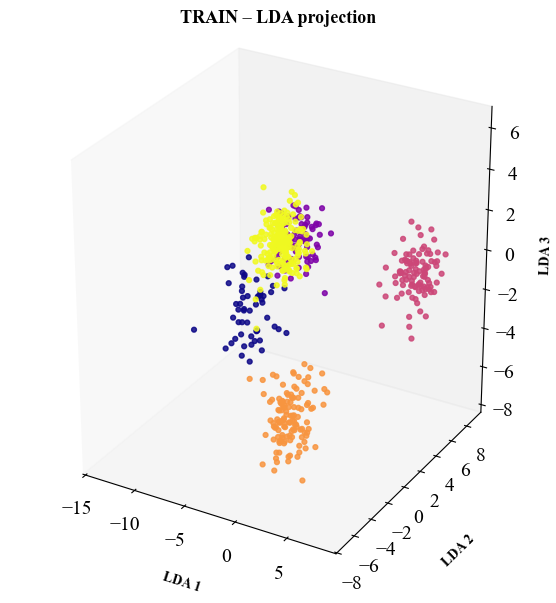

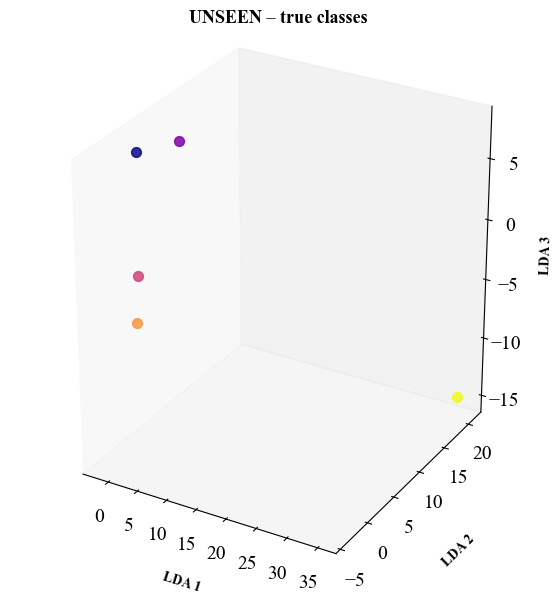

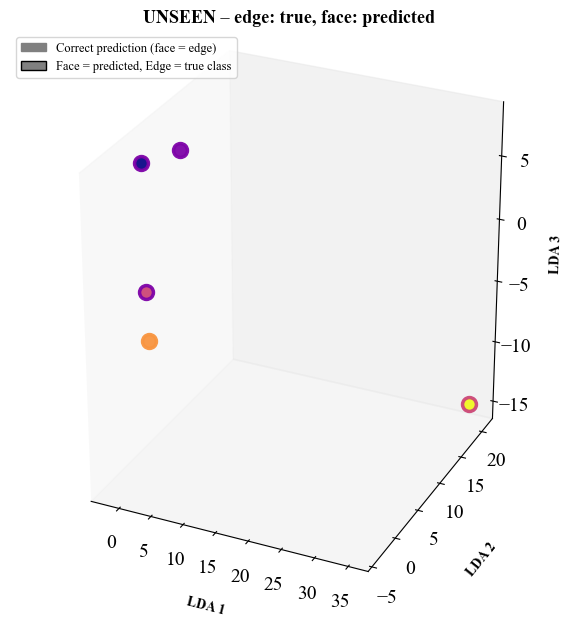


Unseen Prediction Results:
 Sample Index  True Thickness  Predicted Thickness  Match
            0             0.5                  1.0  False
            1             1.0                  1.0   True
            2             2.0                  1.0  False
            3             3.0                  3.0   True
            4             4.0                  2.0  False


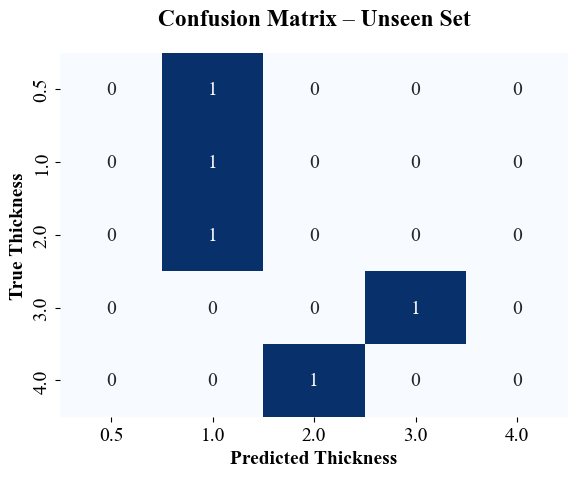

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import viridis
from matplotlib.patches import Patch

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(train_df_New_5['thickness'])
y_unseen = le.transform(unseen_df_New_5['thickness'])

# Extract features
X_train = train_df_New_5.iloc[:, :-4].values
X_unseen = unseen_df_New_5.iloc[:, :-4].values

# Fit scaler on training data only
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_unseen_sc = scaler.transform(X_unseen)
joblib.dump(scaler, 'scaler.pkl')

# Fit LDA on training data only
lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(X_train_sc, y_train)
joblib.dump(lda, 'lda_model.pkl')

# Transform unseen data
X_unseen_lda = lda.transform(X_unseen_sc)
y_pred_unseen = lda.predict(X_unseen_sc)

# Color mapping
classes = np.unique(y_train)

from matplotlib import cm
colormap = plt.get_cmap('plasma', len(classes))
palette = [colormap(i) for i in range(len(classes))]
cmap = {cls: palette[i] for i, cls in enumerate(classes)}

# Plot 1: Train data
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([0.75, 0.8, 0.9])

for cls in classes:
    idx = np.where(y_train == cls)
    ax.scatter(X_train_lda[idx, 0], X_train_lda[idx, 1], X_train_lda[idx, 2],
               color=cmap[cls], s=12, alpha=0.85)

ax.set_title('TRAIN – LDA projection', fontsize=13, fontweight='bold')
ax.set_xlabel('LDA 1', labelpad=10, fontsize=10, fontweight='bold')
ax.set_ylabel('LDA 2', labelpad=17, fontsize=10, fontweight='bold')
ax.set_zlabel('LDA 3', labelpad=10, fontsize=10, fontweight='bold')
ax.view_init(elev=28, azim=-60)
ax.grid(False)
plt.tight_layout()
plt.show()

# Plot 2: Unseen data (true classes)
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([0.75, 0.8, 0.9])

for cls in classes:
    idx = np.where(y_unseen == cls)
    ax.scatter(X_unseen_lda[idx, 0], X_unseen_lda[idx, 1], X_unseen_lda[idx, 2],
               color=cmap[cls], s=50, alpha=0.85)

ax.set_title('UNSEEN – true classes', fontsize=13, fontweight='bold')
ax.set_xlabel('LDA 1', labelpad=10, fontsize=10, fontweight='bold')
ax.set_ylabel('LDA 2', labelpad=17, fontsize=10, fontweight='bold')
ax.set_zlabel('LDA 3', labelpad=10, fontsize=10, fontweight='bold')
ax.view_init(elev=28, azim=-60)
ax.grid(False)
plt.tight_layout()
plt.show()

# Plot 3: Unseen data with predicted (face) and true (edge) classes
fig = plt.figure(figsize=(6, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([0.75, 0.8, 0.9])

for i in range(X_unseen_lda.shape[0]):
    true_cls = y_unseen[i]
    pred_cls = y_pred_unseen[i]
    ax.scatter(X_unseen_lda[i, 0], X_unseen_lda[i, 1], X_unseen_lda[i, 2],
               facecolor=cmap[true_cls],
               edgecolor=cmap[pred_cls],
               linewidths=2.5,
               s=100,
               alpha=0.95)

legend_handles = [
    Patch(facecolor='grey', edgecolor='grey', label='Correct prediction (face = edge)'),
    Patch(facecolor='grey', edgecolor='black', label='Face = predicted, Edge = true class')
]

ax.legend(handles=legend_handles, loc='upper left', fontsize=9)

ax.set_title('UNSEEN – edge: true, face: predicted', fontsize=13, fontweight='bold')
ax.set_xlabel('LDA 1', labelpad=10, fontsize=10, fontweight='bold')
ax.set_ylabel('LDA 2', labelpad=17, fontsize=10, fontweight='bold')
ax.set_zlabel('LDA 3', labelpad=10, fontsize=10, fontweight='bold')
ax.view_init(elev=28, azim=-65)
ax.grid(False)
plt.tight_layout()
plt.show()

# Create a summary table of real vs predicted classes
true_labels = le.inverse_transform(y_unseen)
pred_labels = le.inverse_transform(y_pred_unseen)

results_df = pd.DataFrame({
    'Sample Index': np.arange(len(y_unseen)),
    'True Thickness': true_labels,
    'Predicted Thickness': pred_labels,
    'Match': true_labels == pred_labels
})

print("\nUnseen Prediction Results:")
print(results_df.to_string(index=False))

from sklearn.metrics import confusion_matrix
import seaborn as sns

cmat = confusion_matrix(y_unseen, y_pred_unseen)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cmat,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=le.inverse_transform(classes),
            yticklabels=le.inverse_transform(classes),
            cbar=False,
            ax=ax)

ax.set_xlabel('Predicted Thickness', fontweight='bold')
ax.set_ylabel('True Thickness', fontweight='bold')
ax.set_title('Confusion Matrix – Unseen Set', fontweight='bold', pad = 20)
plt.tight_layout()
plt.show()